# Long vs. Wide Tables

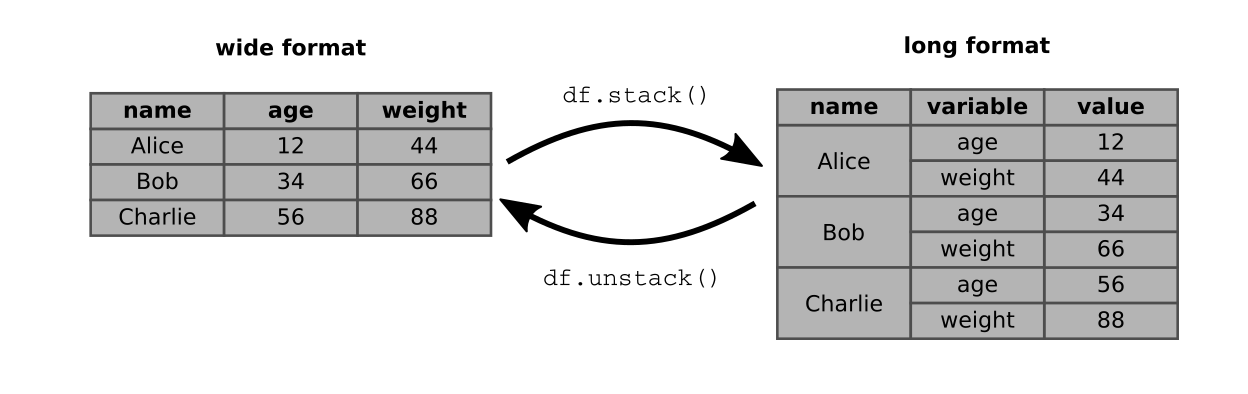

Data in pandas can exist in two forms: long and wide format.

In the long format, there is a single value column, all other descriptors are in a hierarchical index. In the wide format, each descriptor has its own column.

The conversion between long and wide format helps you to bring data into the right format for merging, concatenation or plotting.

If I want to do exploratory data analysis and I might want to manipulate the data and move it around to find something out and characterise it!

I want to be able to generate all possible bar plots from the data.

### Key commands
| command  | description   |
|:----------:|:-------------:|
|pandas.DataFrame.transpose( ) |  swaps rows and columns |
|pandas.DataFrame.stack( )| moves columns to hierarchical row index|
|pandas.DataFrame.unstack( )| creates columns from hierarchical row index |
|pandas.DataFrame.set_index( ) | moves one column into the index |
|pandas.DataFrame.reset_index( ) |	moves the index into a column |

## Exercise - Create an animated scatterplot

In this exercise we will reproduce Hans Roslings famous animation. We will proceed in four steps:

1. Load the data to multiple DataFrames
2. Merge the DataFrames into one
3. Generate one scatterplot for each year.
4. Connect the images to an animated GIF.

### Step 1
Load the file data/gapminder_total_fertility.csv into pandas.

In [1]:
import pandas as pd

In [2]:
fert = pd.read_csv('gapminder_total_fertility.csv',index_col=0)

In [3]:
fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


### Step 2
Proceed in the same way with the file data/gapminder_lifeexpectancy.xlsx. Save it in a DataFrame with the name life.



In [4]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)

In [5]:
life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


### Step 3
Check whether both tables have the same size and shape. It is good practice to do so!

In [6]:
print(fert.shape)
print(life.shape)

(260, 216)
(260, 217)


### Step 4

Take a look at the columns of both tables:

In [7]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [8]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

#### One table has columns as strings, the other has integer numbers. 
To merge the tables, we need to convert both into the same format. First, we create a list of years as integers, and use this list as the new columns!

In [9]:
# This is a list comprehension! 
ncol = [int(x) for x in fert.columns]

In [10]:
fert.set_axis(axis=1, labels=ncol, inplace=True)

#### Check with fert.columns whether the transformation was successful!


In [11]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

Here, we have converted our fert.column list of strings into integers to match the life.column.

We then set the axis to make sure they know where to align before we begin to merge and manipulate the data.

### Step 5
To obtain nice column names, you can also create a hierarchical index. For that, we convert both tables to the long format:

In [12]:
sfert = fert.stack()
slife = life.stack()

The variables sfert and slife now have the type pd.Series. Multiple Series can be converted to a pd.DataFrame, using a dictionary with the values:

In [13]:
d = {'fertility': sfert, 'life exp': slife}
df2 = pd.DataFrame(data=d)

In [14]:
df2.head()

fertility  life exp
Afghanistan 1800        7.0     28.21
            1801        7.0     28.20
            1802        7.0     28.19
            1803        7.0     28.18
            1804        7.0     28.17

### Step 6
Repeat the steps above to add data from the file data/gapminder_population.xlsx.



In [15]:
pop = pd.read_excel('gapminder_population.xlsx', index_col=0)

In [16]:
pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [17]:
print(fert.shape)
print(life.shape)
print(pop.shape)

(260, 216)
(260, 217)
(275, 81)


In [18]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

Don't need to do the list comprehension step because the data is in integer form already, and thereforen nor do you need to set the axis!

In [19]:
spop = pop.stack()

In [20]:
d = {'fertility': sfert, 'life exp': slife, 'population': spop}
df2 = pd.DataFrame(data=d)

In [22]:
df2.head(20)

fertility  life exp  population
Afghanistan 1800        7.0     28.21   3280000.0
            1801        7.0     28.20         NaN
            1802        7.0     28.19         NaN
            1803        7.0     28.18         NaN
            1804        7.0     28.17         NaN
            1805        7.0     28.16         NaN
            1806        7.0     28.15         NaN
            1807        7.0     28.14         NaN
            1808        7.0     28.13         NaN
            1809        7.0     28.12         NaN
            1810        7.0     28.11   3280000.0
            1811        7.0     28.10         NaN
            1812        7.0     28.09         NaN
            1813        7.0     28.08         NaN
            1814        7.0     28.07         NaN
            1815        7.0     28.06         NaN
            1816        7.0     28.05         NaN
            1817        7.0     28.04         NaN
            1818        7.0     28.03         NaN
            1819        7.0     28.02         NaN

### Step 7
The huge DataFrame is easier to convert to the right format, if we first interpret all indices (rows and columns) as row indices:

                    df3 = df2.stack()

In [25]:
df3 = df2.stack()
df3.head(10)

Afghanistan  1800  fertility           7.00
                   life exp           28.21
                   population    3280000.00
             1801  fertility           7.00
                   life exp           28.20
             1802  fertility           7.00
                   life exp           28.19
             1803  fertility           7.00
                   life exp           28.18
             1804  fertility           7.00
dtype: float64

Here, **df3.unstack( )** will return it to the same as df2, as will **df3.unstack(2)**.

**df3.unstack(0)** sets the country along the x-axis and year along the y-axis, with subsections of fertility, life exp, and population! Shape of 514 x 256.

**df3.unstack((0,1))** sets the country and the year along the x-axis and fertility, life exp, and population along the y-axis! With a shape of 3 x 47688.

**df3.unstack((0,2))** sets the country with subsections of fertility, life exp, and population, along the x-axis, and year along the y-axis! Shape of 217 x 667.

**df3.unstack(1)** sets the year along the x-axis, and the country, and subsections of fertility, life exp, and population, along the y-axis! Shape of 667 x 217.

**df3.unstack((1,0))** sets year and country along the x-axis and fert, life exp, and pop along the y-axis! Shape of 3 x 47688.

**df3.unstack((1,1))** sets year along x-axis **twice**! Countries and fertility, life exp, and population along y-axis.

**df3.unstack((1,2))** sets year along x-axis with subsections fertility, life exp, and population, with countries along y-axis!

In [66]:
df3.unstack((1,2)).head()

1800                          1801           \
                      fertility life exp population fertility life exp   
Afghanistan                7.00    28.21  3280000.0      7.00    28.20   
Akrotiri and Dhekelia       NaN      NaN        NaN       NaN      NaN   
Albania                    4.60    35.40   410445.0      4.60    35.40   
Algeria                    6.99    28.82  2503218.0      6.99    28.82   
American Samoa              NaN      NaN     8170.0       NaN      NaN   

                           1802               1803               1804  \
                      fertility life exp fertility life exp fertility   
Afghanistan                7.00    28.19      7.00    28.18      7.00   
Akrotiri and Dhekelia       NaN      NaN       NaN      NaN       NaN   
Albania                    4.60    35.40      4.60    35.40      4.60   
Algeria                    6.99    28.82      6.99    28.82      6.99   
American Samoa              NaN      NaN       NaN      NaN       NaN   

                        ...         2013                           2014  \
                        ...    fertility life exp  population fertility   
Afghanistan             ...         4.90     54.8  30682500.0      4.68   
Akrotiri and Dhekelia   ...          NaN      NaN         NaN       NaN   
Albania                 ...         1.77     77.7   2883281.0      1.78   
Algeria                 ...         2.80     76.3  38186135.0      2.76   
American Samoa          ...          NaN     72.7     55302.0       NaN   

                                                2015                       \
                      life exp  population fertility life exp  population   
Afghanistan               54.9  31627506.0      4.47     53.8  32526562.0   
Akrotiri and Dhekelia      NaN         NaN       NaN      NaN         NaN   
Albania                   77.9   2889676.0      1.78     78.0   2896679.0   
Algeria                   76.3  38934334.0      2.71     76.4  39666519.0   
American Samoa            72.8     55434.0       NaN     72.9     55538.0   

                          2016  
                      life exp  
Afghanistan              52.72  
Akrotiri and Dhekelia      NaN  
Albania                  78.10  
Algeria                  76.50  
American Samoa           73.00  

[5 rows x 514 columns]

Finally we can convert the long table back to a wide one. For that we create new columns from the 1st and 3rd level of the index (the country names and attributes):

                    df4 = df3.unstack((0,2))

In [68]:
df4 = df3.unstack((0,2))
df4.head()

Afghanistan                     Akrotiri and Dhekelia   Albania           \
       fertility life exp population            population fertility life exp   
1800         7.0    28.21  3280000.0                   NaN       4.6     35.4   
1801         7.0    28.20        NaN                   NaN       4.6     35.4   
1802         7.0    28.19        NaN                   NaN       4.6     35.4   
1803         7.0    28.18        NaN                   NaN       4.6     35.4   
1804         7.0    28.17        NaN                   NaN       4.6     35.4   

                  Algeria                       ...         Yemen Yugoslavia  \
     population fertility life exp population   ...    population population   
1800   410445.0      6.99    28.82  2503218.0   ...     2593000.0        NaN   
1801        NaN      6.99    28.82        NaN   ...           NaN        NaN   
1802        NaN      6.99    28.82        NaN   ...           NaN        NaN   
1803        NaN      6.99    28.82        NaN   ...           NaN        NaN   
1804        NaN      6.99    28.82        NaN   ...           NaN        NaN   

        Zambia                      Zimbabwe                          Åland  \
     fertility life exp population fertility life exp population population   
1800      6.71     32.6   747000.0      6.75     33.7  1085814.0        NaN   
1801      6.71     32.6        NaN      6.75     33.7        NaN        NaN   
1802      6.71     32.6        NaN      6.75     33.7        NaN        NaN   
1803      6.71     32.6        NaN      6.75     33.7        NaN        NaN   
1804      6.71     32.6        NaN      6.75     33.7        NaN        NaN   

               
     life exp  
1800      NaN  
1801      NaN  
1802      NaN  
1803      NaN  
1804      NaN  

[5 rows x 667 columns]

The zero stands for the first element of an index. With the value 1 all year numbers would end up as columns.

Now df4 is a table, with years on the left side and life expectancy and fertility for a ll countries on top.

### Step 8

Now you can select specific columns and plot them:

In [70]:
import pylab as plt

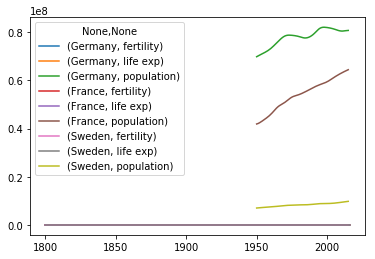

In [71]:
df4[['Germany', 'France', 'Sweden']].plot()

This gives us a bad plot! Let's wrangle the data and drop some tables!

In [72]:
data_f = df2

In [73]:
data_f.drop('population', axis=1).head()

fertility  life exp
Afghanistan 1800        7.0     28.21
            1801        7.0     28.20
            1802        7.0     28.19
            1803        7.0     28.18
            1804        7.0     28.17

In [74]:
data_f2 = data_f.drop('population', axis=1)

In [79]:
# Stack that table
data_f3 = data_f2.stack()

In [81]:
data_f4 = data_f3.unstack((0,2))
data_f4.head()

Afghanistan            Albania            Algeria           \
       fertility life exp fertility life exp fertility life exp   
1800         7.0    28.21       4.6     35.4      6.99    28.82   
1801         7.0    28.20       4.6     35.4      6.99    28.82   
1802         7.0    28.19       4.6     35.4      6.99    28.82   
1803         7.0    28.18       4.6     35.4      6.99    28.82   
1804         7.0    28.17       4.6     35.4      6.99    28.82   

     American Samoa  Andorra    Angola            ...    West Bank and Gaza  \
           life exp life exp fertility life exp   ...              life exp   
1800            NaN      NaN      6.93    26.98   ...                  32.1   
1801            NaN      NaN      6.93    26.98   ...                  32.1   
1802            NaN      NaN      6.93    26.98   ...                  32.1   
1803            NaN      NaN      6.93    26.98   ...                  32.1   
1804            NaN      NaN      6.93    26.98   ...                  32.1   

     Western Sahara              Yemen             Zambia           Zimbabwe  \
          fertility life exp fertility life exp fertility life exp fertility   
1800           6.32    34.75      6.88    23.39      6.71     32.6      6.75   
1801           6.32    34.75      6.88    23.39      6.71     32.6      6.75   
1802           6.32    34.75      6.88    23.39      6.71     32.6      6.75   
1803           6.32    34.75      6.88    23.39      6.71     32.6      6.75   
1804           6.32    34.75      6.88    23.39      6.71     32.6      6.75   

                 Åland  
     life exp life exp  
1800     33.7      NaN  
1801     33.7      NaN  
1802     33.7      NaN  
1803     33.7      NaN  
1804     33.7      NaN  

[5 rows x 411 columns]

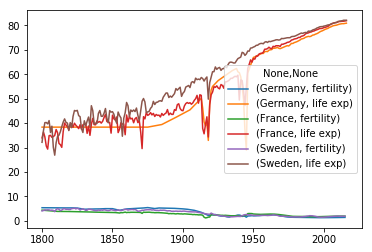

In [82]:
data_f4[['Germany', 'France', 'Sweden']].plot()

Much better!

Now let's create a scatterplot by extracting the columns to plot from df3.

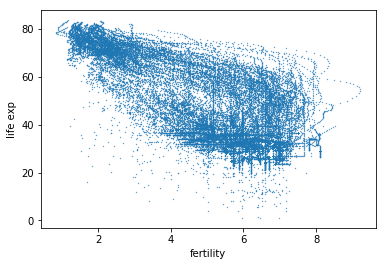

In [86]:
df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'life exp', s=0.1)

#### Using stack and unstack you can also select a year. Here we are selecting the year 1950. That makes the plot easier to read:

In [98]:
df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.head()

,fertility,life exp,population
Afghanistan,7.67,26.85,7752118.0
Akrotiri and Dhekelia,NaN,NaN,10661.0
Albania,5.80,54.48,1263171.0
Algeria,7.65,42.77,8872247.0
American Samoa,NaN,NaN,18937.0


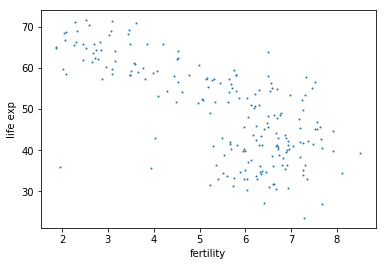

In [107]:
df6.plot.scatter('fertility', 'life exp', s=1)
# s varies the size of the dots!

### Step 9
Now we can improve our graphics, e.g. color each country differently:

**Hint - The lut parameter allows you to control the length of the color array (which by default is 20), and in the commented out code we ensure that it is same length as the index of our dataframe.**

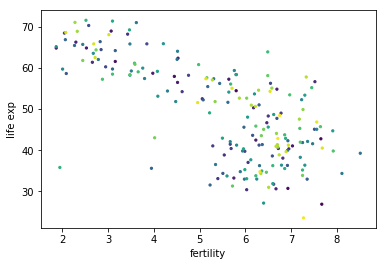

In [111]:
cmap = plt.get_cmap().colors
#cmap = plt.get_cmap('tab20', lut = len(df6)).colors
df6.plot.scatter('fertility', 'life exp', s=5, c=cmap)

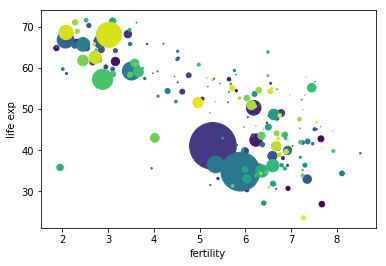

In [112]:
df6.plot.scatter('fertility', 'life exp', s=df6['population']*0.000004, c=cmap)

### Step 10 

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

Save each scatterplot to a separate file containing the year in the filename, e.g. lifeexp_1999.png .

### Step 11

Adjust the plot, so that the size of the symbols represents the population from the gapminder dataset.

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


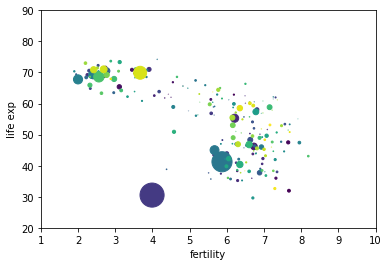

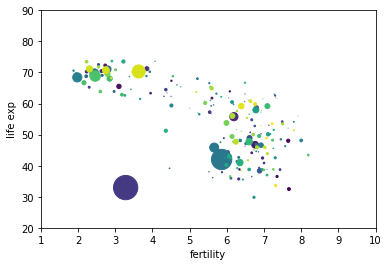

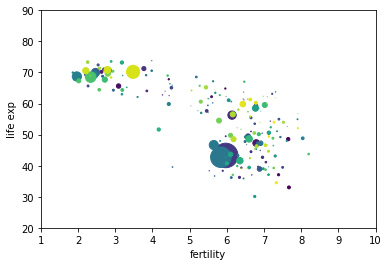

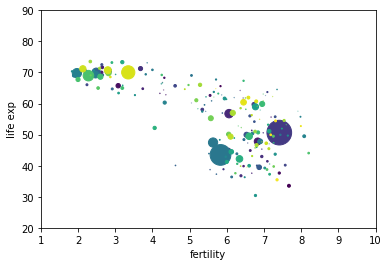

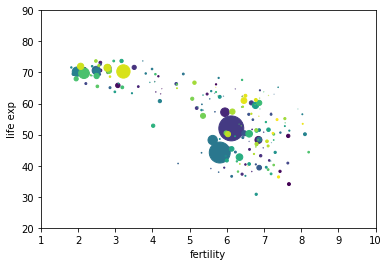

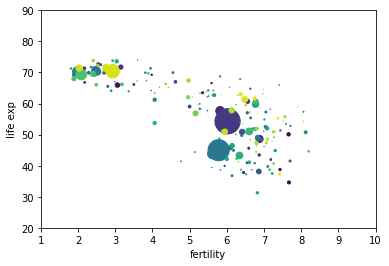

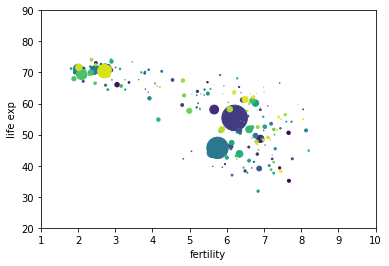

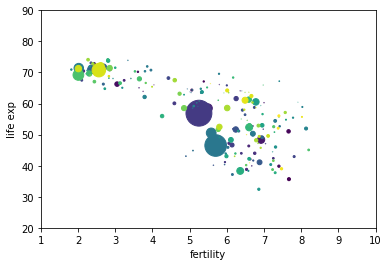

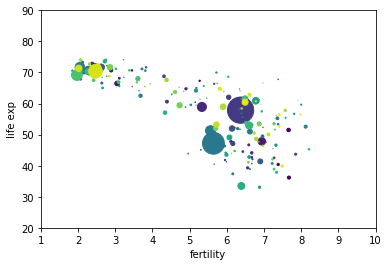

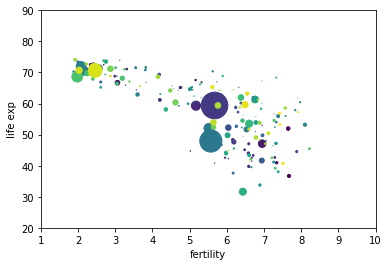

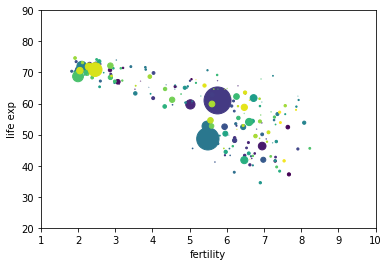

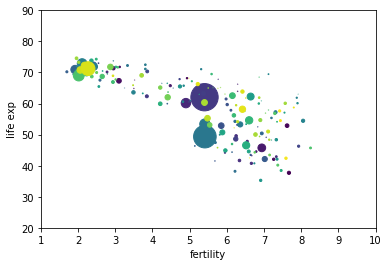

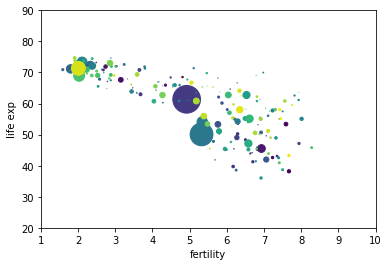

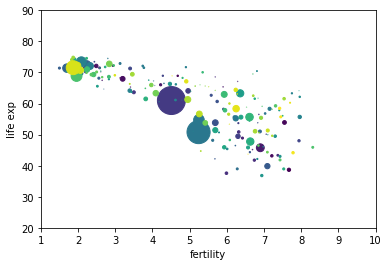

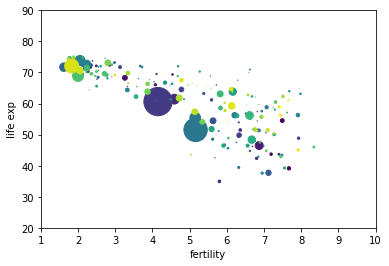

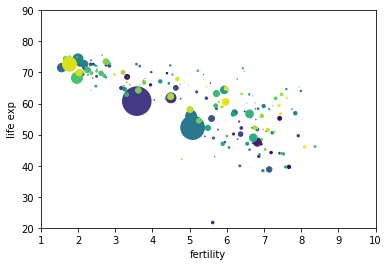

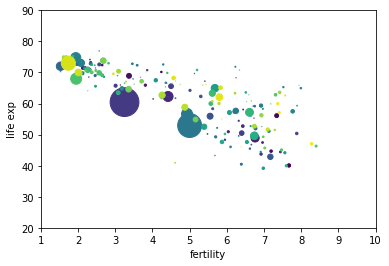

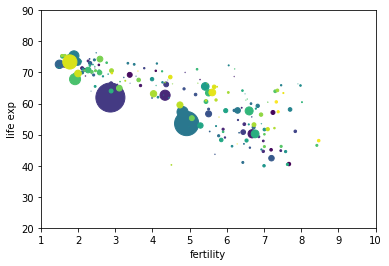

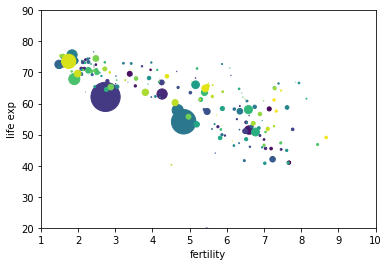

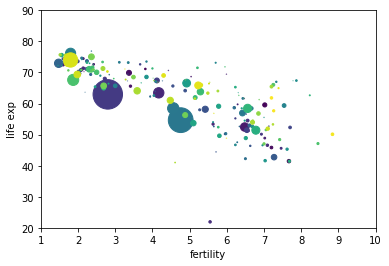

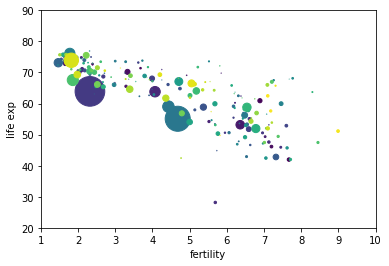

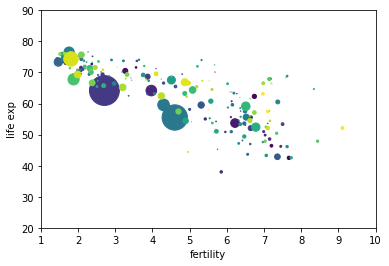

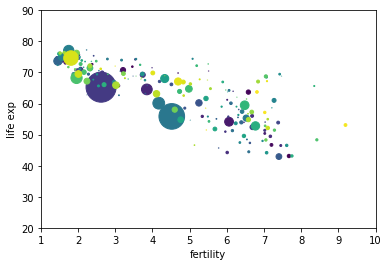

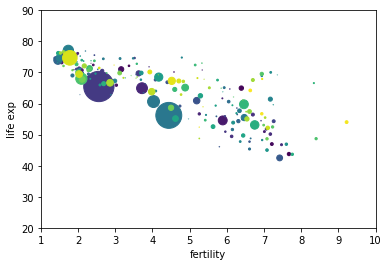

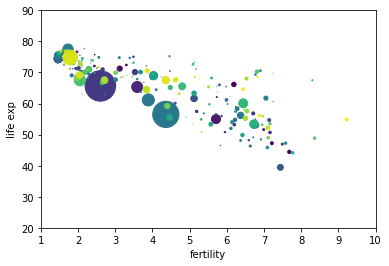

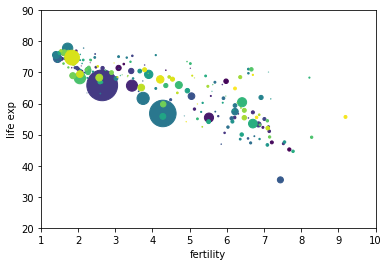

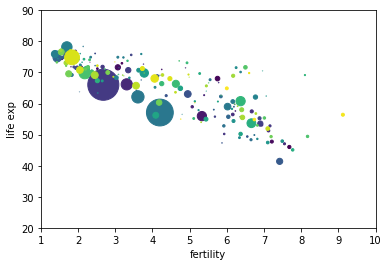

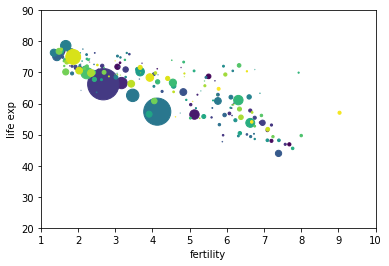

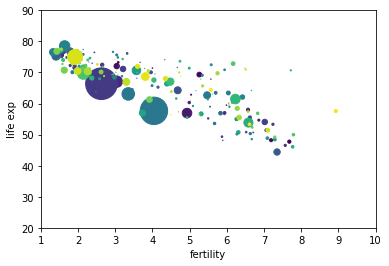

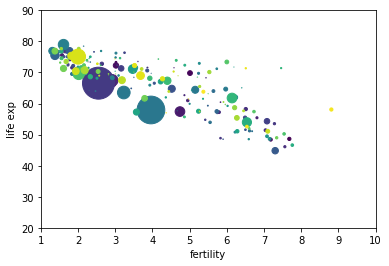

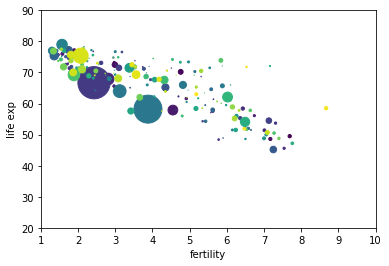

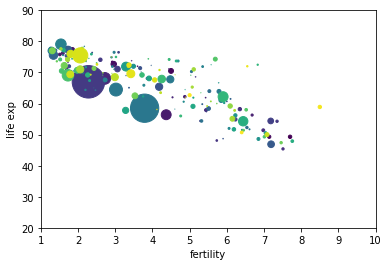

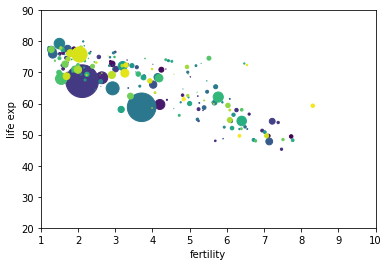

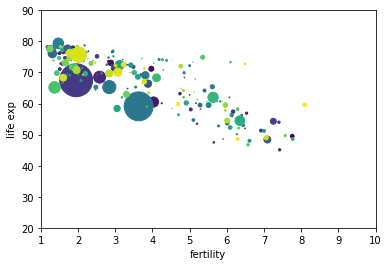

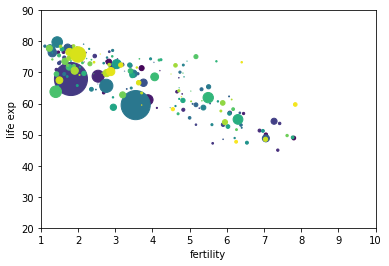

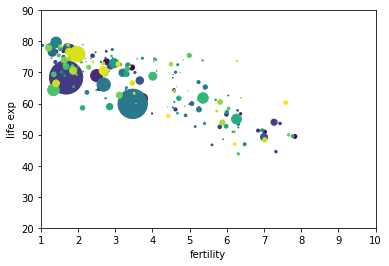

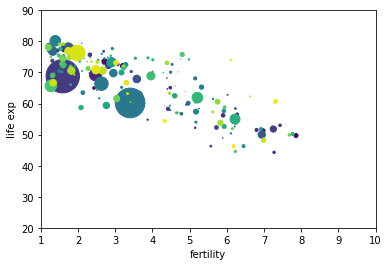

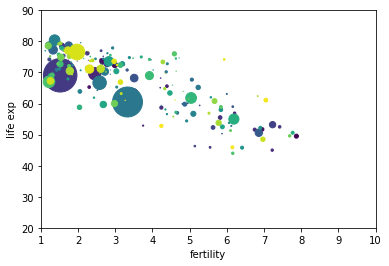

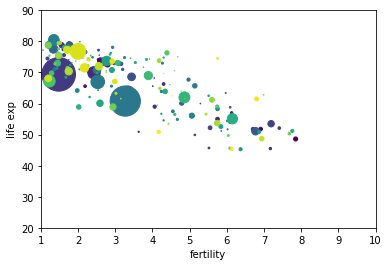

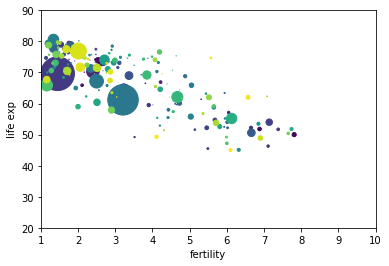

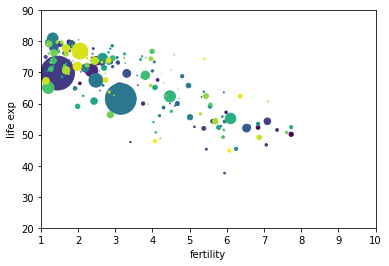

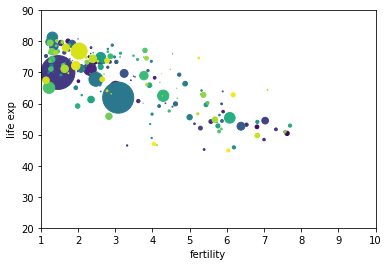

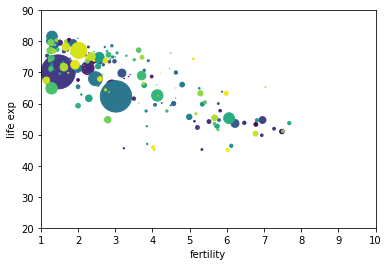

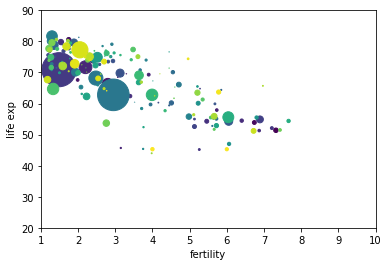

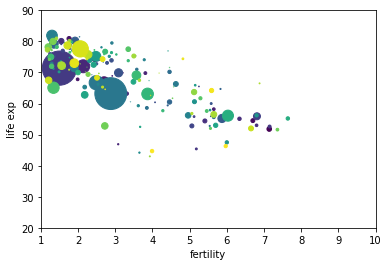

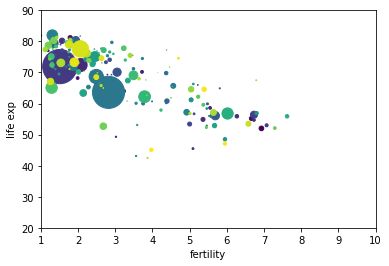

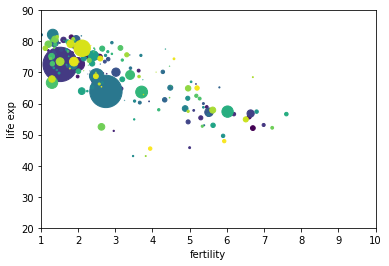

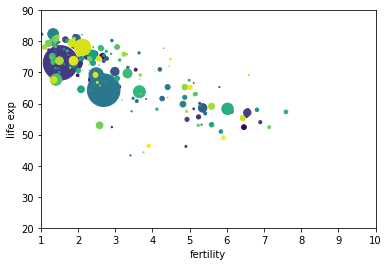

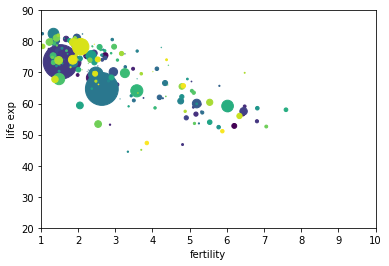

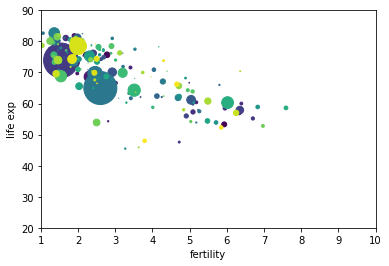

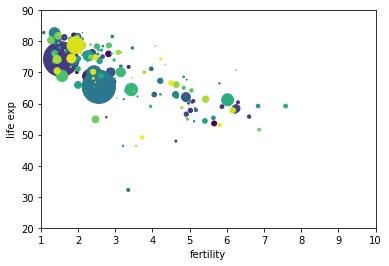

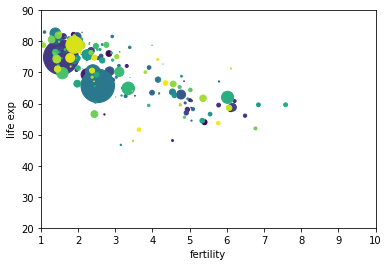

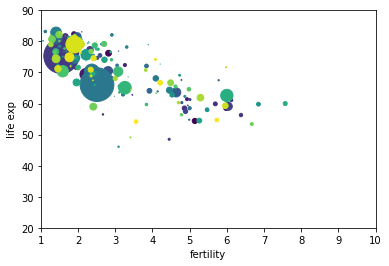

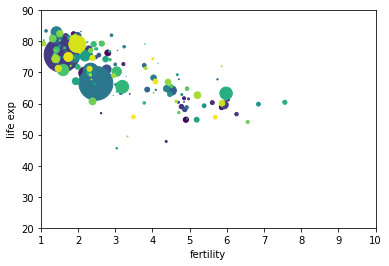

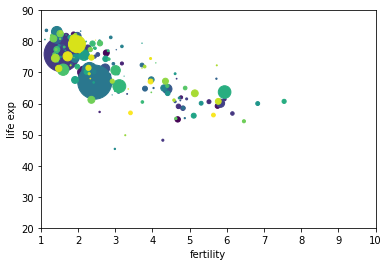

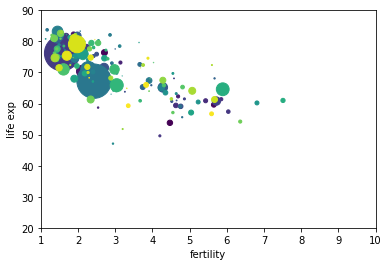

In [114]:
years = list(range(1960,2016))

for y in years:
    df6 = df3.unstack(1)
    df6 = df6[y]
    df6 = df6.unstack(1)
    df6.plot.scatter('fertility', 'life exp', 
                 s=df6['population']*0.0000009, c=cmap)
    plt.axis((1,10,20,90))
    plt.savefig(f'lifeexp_{y}.png', dpi = 300)

### Step 12

Install the Python module imageio.
    
Adjust the code example and execute it:

In [116]:
import imageio

images = []

for i in range(1960, 2016):
    filename = f'lifeexp_{i}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('output_fps15.gif', images, fps=15)